In [1]:
import pandas as pd
from datetime import datetime
import scipy.stats
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.preprocessing as preproc

df= pd.read_csv('popen-data-dublinkeddatacycle-counter-datajan-dec-2019-cycle.csv')

In [2]:
df.tail(2)

,Date and Time,Grove Road Totem,North Strand Rd S/B,North Strand Rd N/B,Charleville Mall,Guild Street
8757,31-12-2019 22:00:00,23.0,13,8,3,9.0
8758,31-12-2019 23:00:00,26.0,9,5,6,8.0


In [3]:
df.shape

(8759, 6)

In [4]:
df.describe()

,Grove Road Totem,North Strand Rd S/B,North Strand Rd N/B,Charleville Mall,Guild Street
count,8743.000000,8759.000000,8759.000000,8759.000000,8757.000000
mean,136.143200,49.328576,57.432926,5.968718,52.268471
std,177.879459,84.049741,85.377890,7.640347,64.478328
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,7.000000,13.000000,1.000000,12.000000
50%,81.000000,25.000000,31.000000,4.000000,32.000000
75%,135.000000,50.000000,59.000000,8.000000,55.000000
max,1152.000000,595.000000,615.000000,61.000000,420.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date and Time        8759 non-null   object 
 1   Grove Road Totem     8743 non-null   float64
 2   North Strand Rd S/B  8759 non-null   int64  
 3   North Strand Rd N/B  8759 non-null   int64  
 4   Charleville Mall     8759 non-null   int64  
 5   Guild Street         8757 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 410.7+ KB


In [6]:
df.count()

Date and Time          8759
Grove Road Totem       8743
North Strand Rd S/B    8759
North Strand Rd N/B    8759
Charleville Mall       8759
Guild Street           8757
dtype: int64

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

Date and Time           0
Grove Road Totem       16
North Strand Rd S/B     0
North Strand Rd N/B     0
Charleville Mall        0
Guild Street            2
dtype: int64

df.hist(column = 'Guild Street', bins =50)

df.hist(column = 'Grove Road Totem', bins =50)

In [9]:
df['Grove Road Totem'] = df['Grove Road Totem'].fillna(df["Grove Road Totem"].median())

In [10]:
df['Guild Street'] = df['Guild Street'].fillna(df["Guild Street"].median())

In [11]:
df.isnull().sum()

Date and Time          0
Grove Road Totem       0
North Strand Rd S/B    0
North Strand Rd N/B    0
Charleville Mall       0
Guild Street           0
dtype: int64

In [12]:
print(df["Grove Road Totem"].nunique())
print(df["North Strand Rd S/B"].nunique())
print(df["North Strand Rd N/B"].nunique())
print(df["Charleville Mall"].nunique())

781
427
461
61


In [13]:
from scipy.stats import kurtosis, skew
print(skew(df["North Strand Rd S/B"], bias =False))
print(kurtosis(df["North Strand Rd S/B"], bias=False))

3.6510267564314947
14.952523372049075


In [14]:
print(skew(df["Grove Road Totem"], bias = False))
print(skew(df["North Strand Rd S/B"], bias = False))
print(skew(df["North Strand Rd N/B"], bias = False))
print(skew(df["Charleville Mall"], bias = False))
print(skew(df["Guild Street"], bias = False))

2.5724586594666743
3.6510267564314947
3.173386503722905
3.176337753780164
2.2861134017096596


array([[<AxesSubplot:title={'center':'Grove Road Totem'}>]], dtype=object)

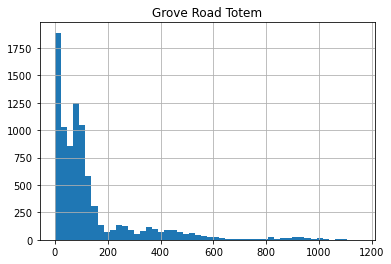

In [15]:
df.hist(column = 'Grove Road Totem', bins =50)

In [16]:
df["Date and Time"] = pd.to_datetime(df['Date and Time'])

In [17]:
df['Month']= df["Date and Time"].dt.month

In [18]:
df['Day']= df["Date and Time"].dt.day

In [19]:
df['Time']= df["Date and Time"].dt.time

In [20]:
from numpy import median, mean

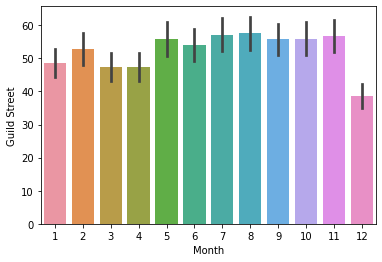

In [21]:
ax=sns.barplot(y = "Guild Street", x = "Month", data = df)

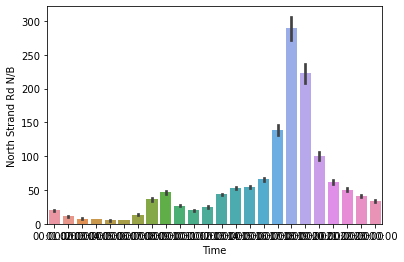

In [22]:
ax=sns.barplot(x = "Time", y = "North Strand Rd N/B", data = df)

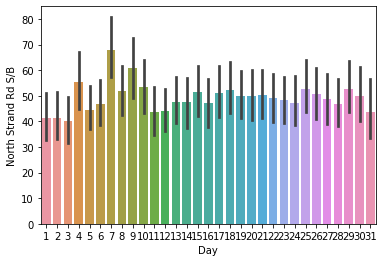

In [23]:
ax=sns.barplot(x = "Day", y = "North Strand Rd S/B", data = df)

In [24]:
df.dtypes

Date and Time          datetime64[ns]
Grove Road Totem              float64
North Strand Rd S/B             int64
North Strand Rd N/B             int64
Charleville Mall                int64
Guild Street                  float64
Month                           int64
Day                             int64
Time                           object
dtype: object

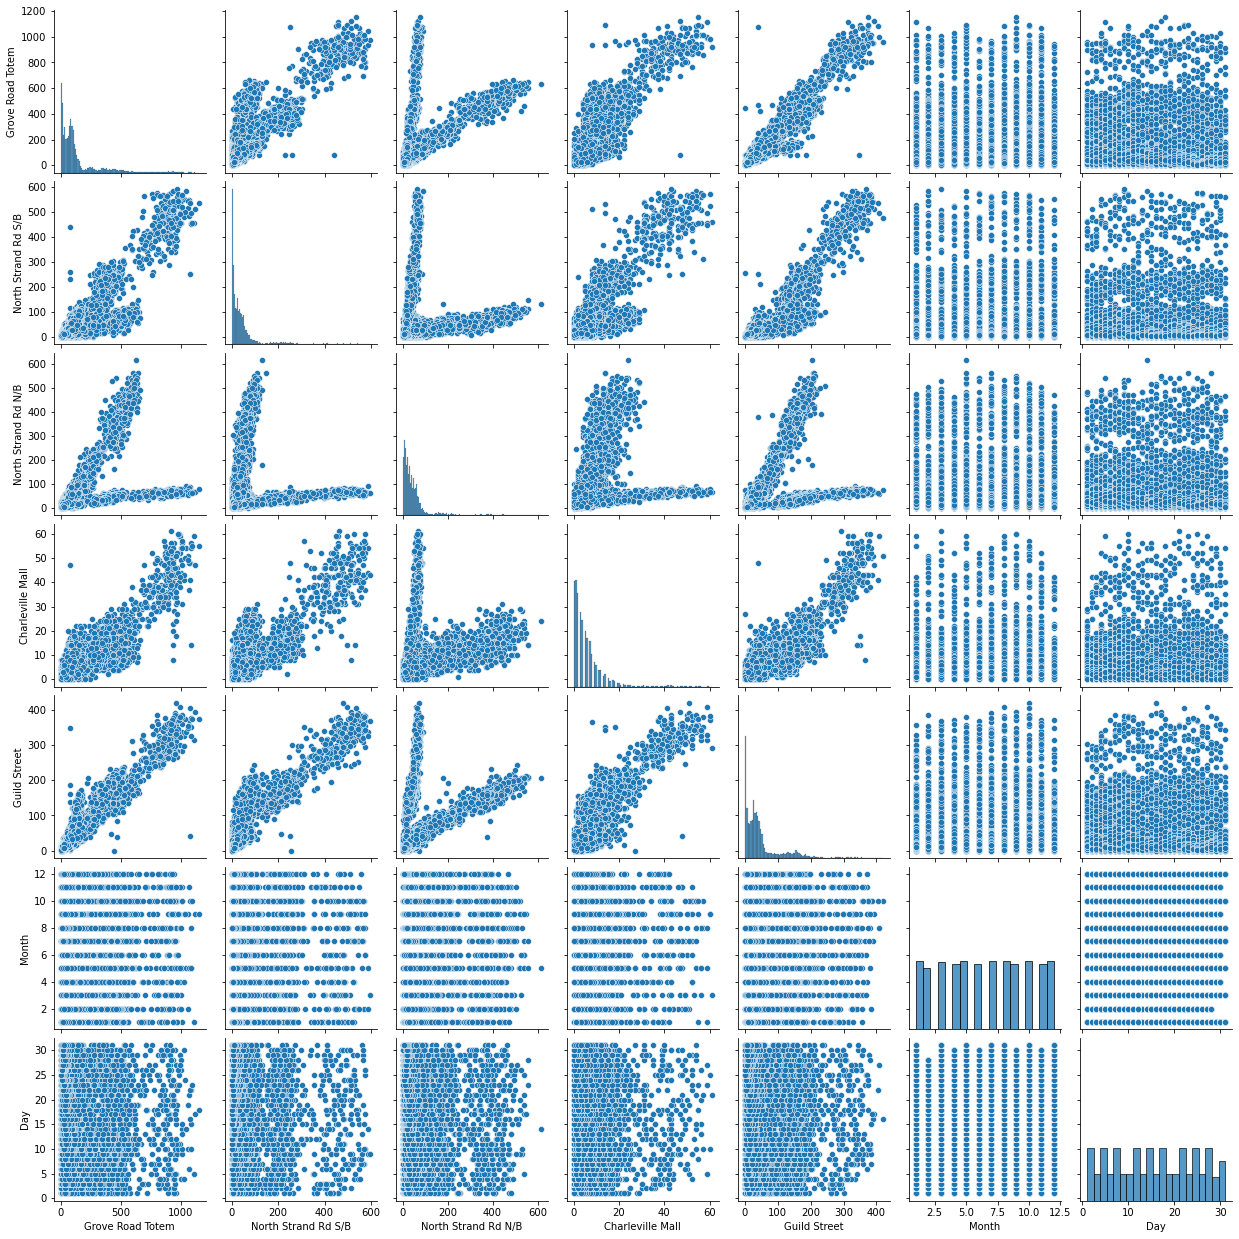

In [25]:
import seaborn as sns
sns.pairplot(df)

In [26]:
df_time = df.groupby('Time', axis = 0).sum()
df_time

,Grove Road Totem,North Strand Rd S/B,North Strand Rd N/B,Charleville Mall,Guild Street,Month,Day
Time,,,,,,,
00:00:00,8176.0,1526,7238,570,2787.0,2382,5738
01:00:00,3989.0,747,4050,337,1017.0,2379,5707
02:00:00,3078.0,644,2675,316,604.0,2382,5738
03:00:00,2589.0,742,2597,398,863.0,2382,5738
04:00:00,4242.0,2276,1822,408,1314.0,2382,5738
05:00:00,10655.0,7122,2102,417,6574.0,2382,5738
06:00:00,38275.0,25124,4848,1633,32542.0,2382,5738
07:00:00,103564.0,51451,13150,3391,45651.0,2382,5738
08:00:00,218607.0,112887,16988,9924,76749.0,2382,5738


In [27]:
df_time.min()

Grove Road Totem       2589.0
North Strand Rd S/B     644.0
North Strand Rd N/B    1822.0
Charleville Mall        316.0
Guild Street            604.0
Month                  2379.0
Day                    5707.0
dtype: float64

In [28]:
df_time.max()

Grove Road Totem       218607.0
North Strand Rd S/B    112887.0
North Strand Rd N/B    105462.0
Charleville Mall         9924.0
Guild Street            76749.0
Month                    2382.0
Day                      5738.0
dtype: float64

In [29]:
df_time.var()

Grove Road Totem       2.679869e+09
North Strand Rd S/B    6.204538e+08
North Strand Rd N/B    6.421230e+08
Charleville Mall       4.165660e+06
Guild Street           3.483733e+08
Month                  3.750000e-01
Day                    4.004167e+01
dtype: float64

In [30]:
df_month = df.groupby('Month', axis = 0).sum()
df_month

,Grove Road Totem,North Strand Rd S/B,North Strand Rd N/B,Charleville Mall,Guild Street,Day
Month,,,,,,
1,99145.0,34075,39522,3880,36207.0,11904
2,95178.0,33837,39887,3829,35400.0,9744
3,93916.0,33190,39125,4039,35124.0,11873
4,92113.0,33107,38207,3959,34049.0,11160
5,112311.0,39583,48338,5086,41589.0,11904
6,89102.0,37926,42496,4778,38862.0,11160
7,106340.0,41666,46750,5012,42408.0,11904
8,107180.0,41434,46395,5017,42857.0,11904
9,104068.0,37956,44657,4807,40150.0,11160


In [31]:
df_month.max()

Grove Road Totem       112311.0
North Strand Rd S/B     41666.0
North Strand Rd N/B     48338.0
Charleville Mall         5086.0
Guild Street            42857.0
Day                     11904.0
dtype: float64

In [32]:
df_month.min()

Grove Road Totem       76183.0
North Strand Rd S/B    26361.0
North Strand Rd N/B    31007.0
Charleville Mall        3135.0
Guild Street           28655.0
Day                     9744.0
dtype: float64

In [33]:
df_month.mean()

Grove Road Totem       99299.666667
North Strand Rd S/B    36005.750000
North Strand Rd N/B    41921.250000
Charleville Mall        4356.666667
Guild Street           38148.250000
Day                    11473.416667
dtype: float64

In [34]:
df_month.var()

Grove Road Totem       1.084492e+08
North Strand Rd S/B    1.835053e+07
North Strand Rd N/B    2.246398e+07
Charleville Mall       3.717282e+05
Guild Street           1.848522e+07
Day                    4.232619e+05
dtype: float64

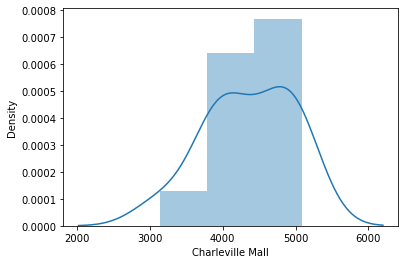

In [35]:
import seaborn as sns
sns.distplot(df_month["Charleville Mall"]);

In [36]:
df_month.describe()

,Grove Road Totem,North Strand Rd S/B,North Strand Rd N/B,Charleville Mall,Guild Street,Day
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,99299.666667,36005.750000,41921.250000,4356.666667,38148.250000,11473.416667
std,10413.892551,4283.751502,4739.618476,609.695205,4299.444174,650.585814
min,76183.000000,26361.000000,31007.000000,3135.000000,28655.000000,9744.000000
25%,93465.250000,33675.250000,39422.750000,3939.250000,35331.000000,11160.000000
50%,101606.500000,36467.000000,42777.500000,4369.000000,39506.000000,11888.500000
75%,107235.500000,38362.750000,45091.500000,4858.250000,41542.500000,11904.000000
max,112311.000000,41666.000000,48338.000000,5086.000000,42857.000000,11904.000000


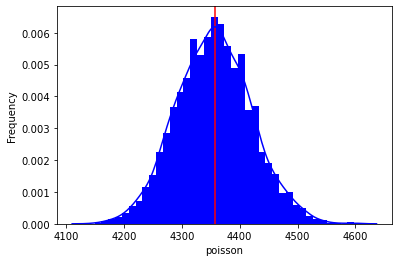

In [37]:
import statistics
from scipy.stats import poisson

x = poisson.rvs(mu = 4356.666667, size = 3135)
plt.axvline(4356.666667, color = 'red')
ax = sns.distplot(x, kde= True, color ='blue', hist_kws ={"linewidth":25, 'alpha':1})
ax.set(xlabel='poisson', ylabel='Frequency')
plt.show()

In [38]:
import statistics
from scipy.stats import norm
norm.pdf(1, loc = 4356.666667, scale= 609.695205)

5.411154054467316e-15

In [39]:
from scipy.stats import kurtosis, skew
print(skew(df["North Strand Rd S/B"], bias =False))
print(skew(df["North Strand Rd N/B"], bias =False))
print(skew(df["Grove Road Totem"], bias =False))
print(skew(df["Charleville Mall"], bias =False))
print(skew(df["Guild Street"], bias =False))



3.6510267564314947
3.173386503722905
2.5724586594666743
3.176337753780164
2.2861134017096596


[Text(0.5, 0, 'Grove Road Totem'),
 Text(0, 0.5, 'Number of cyclist'),
 Text(0.5, 1.0, 'Cyclist on Grove Road Totem')]

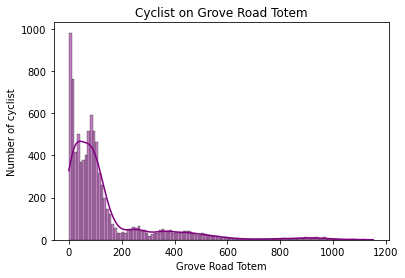

In [40]:
ax = sns.histplot(df['Grove Road Totem'],  kde=True, color ='Purple')
ax.set(xlabel='Grove Road Totem', ylabel='Number of cyclist', title ='Cyclist on Grove Road Totem')

[Text(0.5, 0, 'Grove Road Totem'),
 Text(0, 0.5, 'Number of cyclist'),
 Text(0.5, 1.0, 'Cyclist on Grove Road Totem')]

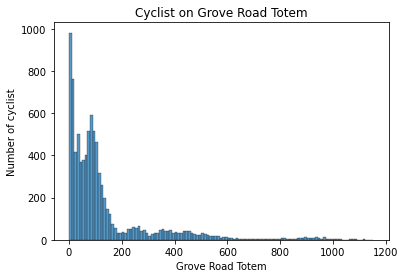

In [41]:
ax = sns.histplot(df['Grove Road Totem'])
ax.set(xlabel='Grove Road Totem', ylabel='Number of cyclist', title ='Cyclist on Grove Road Totem')

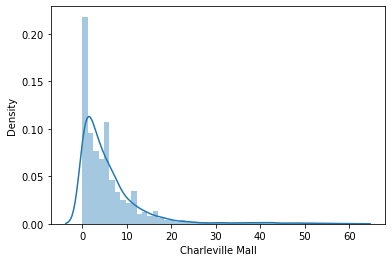

In [42]:
import seaborn as sns
sns.distplot(df["Charleville Mall"]);

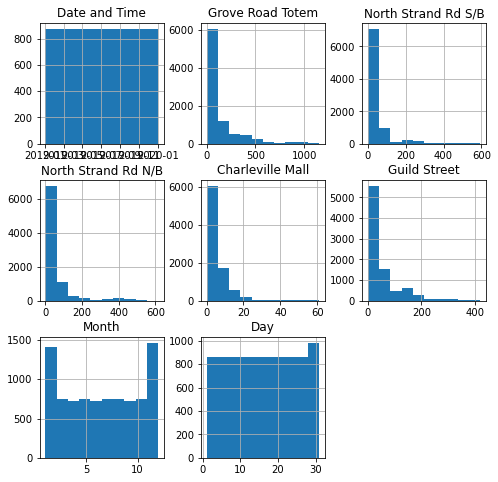

In [43]:
fig = plt.figure(figsize = (8,8))              # Size of the figure
ax = fig.gca()                                
df.hist(ax = ax)                          # draw a histogram based on the dataset
plt.show()

In [44]:
# shift column 'Name' to first position
first_column = df.pop('Month')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'Month', first_column)
  
print()
print("After Shifting column to first position")
display(df)


After Shifting column to first position


,Month,Date and Time,Grove Road Totem,North Strand Rd S/B,North Strand Rd N/B,Charleville Mall,Guild Street,Day,Time
0,1,2019-01-01 00:00:00,12.0,4,16,1,5.0,1,00:00:00
1,1,2019-01-01 01:00:00,17.0,8,14,1,6.0,1,01:00:00
2,1,2019-01-01 02:00:00,18.0,9,9,2,2.0,1,02:00:00
3,1,2019-01-01 03:00:00,18.0,5,15,1,3.0,1,03:00:00
4,1,2019-01-01 04:00:00,12.0,3,8,1,5.0,1,04:00:00
...,...,...,...,...,...,...,...,...,...
8754,12,2019-12-31 19:00:00,41.0,12,18,1,20.0,31,19:00:00
8755,12,2019-12-31 20:00:00,48.0,13,19,4,15.0,31,20:00:00
8756,12,2019-12-31 21:00:00,26.0,15,16,2,18.0,31,21:00:00
8757,12,2019-12-31 22:00:00,23.0,13,8,3,9.0,31,22:00:00


In [45]:
df.pop('Date and Time')

0      2019-01-01 00:00:00
1      2019-01-01 01:00:00
2      2019-01-01 02:00:00
3      2019-01-01 03:00:00
4      2019-01-01 04:00:00
               ...        
8754   2019-12-31 19:00:00
8755   2019-12-31 20:00:00
8756   2019-12-31 21:00:00
8757   2019-12-31 22:00:00
8758   2019-12-31 23:00:00
Name: Date and Time, Length: 8759, dtype: datetime64[ns]

In [46]:
df.pop('Time')

0       00:00:00
1       01:00:00
2       02:00:00
3       03:00:00
4       04:00:00
          ...   
8754    19:00:00
8755    20:00:00
8756    21:00:00
8757    22:00:00
8758    23:00:00
Name: Time, Length: 8759, dtype: object

In [75]:
df.pop('Day')

KeyError: 'Day'

In [ ]:
df.head(2)

In [ ]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
df['Grove Road Totem']=preproc.normalize(df[["Grove Road Totem"]])

In [ ]:
df['North Strand Rd S/B']= preproc.normalize(df[["North Strand Rd S/B"]])

In [ ]:
df['North Strand Rd N/B']= preproc.normalize(df[["North Strand Rd N/B"]])

In [76]:
df['Charleville Mall']= preproc.normalize(df[["Charleville Mall"]])

In [77]:
df['Guild Street']= preproc.normalize(df[["Guild Street"]])

In [78]:
df.describe()

,Month,Grove Road Totem,North Strand Rd S/B,North Strand Rd N/B,Charleville Mall,Guild Street
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,6.526430,0.998516,0.970773,0.995319,0.867565,0.979107
std,3.448039,0.038499,0.168452,0.068261,0.338983,0.143034
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
df.iloc[:,[1,4,5]]

,Grove Road Totem,Charleville Mall,Guild Street
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0
...,...,...,...
8754,1.0,1.0,1.0
8755,1.0,1.0,1.0
8756,1.0,1.0,1.0
8757,1.0,1.0,1.0


In [81]:
df.iloc[:,[2,3]]

,North Strand Rd S/B,North Strand Rd N/B
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
8754,1.0,1.0
8755,1.0,1.0
8756,1.0,1.0
8757,1.0,1.0


In [82]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(df.iloc[:,[1,4,5]], df.iloc[:,[2,3]], test_size=0.3)

In [83]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((6131, 3), (6131, 2), (2628, 3), (2628, 2))

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
neighbors = np.arange(1, 9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [86]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)      # Save the score value in the train_accuracy array

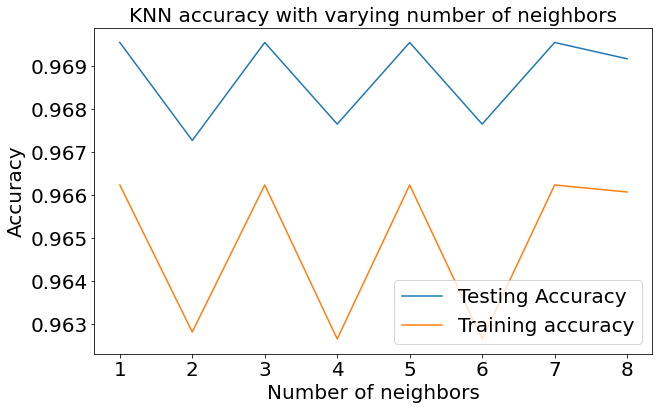

In [87]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [88]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

In [89]:
# Display the test accuracy
print(test_accuracy)

0.969558599695586


In [90]:
x= df.iloc[:,[1,4,5]]

In [91]:
y=df.iloc[:,[2,3]]

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=0)

In [93]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [94]:
y_pred= ml.predict(x_test)
print(y_pred)

[[0.98164696 0.99826476]
 [0.98164696 0.99826476]
 [0.77667394 0.97171735]
 ...
 [0.98164696 0.99826476]
 [0.93067441 0.98593037]
 [0.98164696 0.99826476]]


In [95]:
ml.predict([[12.0, 1, 5.0]])

array([[2.67890122, 2.93171823]])

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0481308425004649